In [1]:
!python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install kagglehub[pandas-datasets]>=0.3.8 geopy

In [3]:
import kagglehub
import zipfile
import os
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [4]:
class Pad_clase:
    def __init__(self):
        pass

    def download_dataset_zip(self,url = ""):
        print("Descargando dataset desde Kaggle...")
        dataset_path = kagglehub.dataset_download(url)
        print("Ruta al dataset:", dataset_path)
        return dataset_path

    def extract_zip_files(self,dataset_path):
        zip_files = [f for f in os.listdir(dataset_path) if f.endswith('.zip')]
        if zip_files:
            zip_file = os.path.join(dataset_path, zip_files[0])
            extract_dir = os.path.join(dataset_path, "extracted")
            os.makedirs(extract_dir, exist_ok=True)
            print(f"Extrayendo {zip_file} en {extract_dir}...")
            with zipfile.ZipFile(zip_file, "r") as z:
                z.extractall(extract_dir)
            return extract_dir
        else:
            # Si no se encuentra un ZIP, se verifica si existen archivos CSV en la ruta
            csv_files = [f for f in os.listdir(dataset_path) if f.endswith('.csv')]
            if csv_files:
                print("No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.")
                return dataset_path
            else:
                raise FileNotFoundError("No se encontró ningún archivo .zip ni archivos .csv en la ruta del dataset")

    def create_csv(self,csv_dir):
        #os.makedirs('src/static/csv', exist_ok=True)
        csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]
        if not csv_files:
            raise FileNotFoundError("No se encontraron archivos CSV en el directorio extraído")

        for file in csv_files:
            file_path = os.path.join(csv_dir, file)
            print(f"Leyendo {file_path}...")
            try:
                df = pd.read_csv(file_path, encoding="latin1")
            except Exception as e:
                print(f"Error al leer {file}: {e}")
                continue
            print(f"Creando/actualizando ")
        print("cvs creado correctamente en ")
        return df

    def columna_regex(self,df_datos =pd.DataFrame(), reg = r"",columna ="",n_columnas = []):
        df = df_datos.copy()
        df[n_columnas] = df[columna].str.extract(reg).astype(int)
        return df

    def limpieza_nan_null(self,df_datos =pd.DataFrame(), name_col="", reemplezar=""):
        if df_datos[name_col].isnull().sum()>0:
            df = df_datos.copy()
            df[name_col]=df[name_col].fillna(reemplezar)
            print("cantidad antes {}/{}  despues {}/{} ".format(df_datos[name_col].isnull().sum(),len(df_datos),df[name_col].isnull().sum(),len(df)))
            return df
        print("no hay nulos")
        return df_datos
            #df_n["Company Profile"]=df_n["Company Profile"].fillna('{"Sector":"","Industry":""}')

In [5]:
padclase = Pad_clase()
dataset_path = padclase.download_dataset_zip("deepshah16/formula-1-19502020")
csv_dir = padclase.extract_zip_files(dataset_path)
df = padclase.create_csv(csv_dir)

Descargando dataset desde Kaggle...


100%|██████████| 79.8k/79.8k [00:00<00:00, 43.5MB/s]

Extracting files...
Ruta al dataset: /root/.cache/kagglehub/datasets/deepshah16/formula-1-19502020/versions/5
No se encontró archivo ZIP pero se detectaron archivos CSV; se asume que el dataset ya se encuentra extraído.
Leyendo /root/.cache/kagglehub/datasets/deepshah16/formula-1-19502020/versions/5/ConstructorStandings.csv...
Creando/actualizando 
Leyendo /root/.cache/kagglehub/datasets/deepshah16/formula-1-19502020/versions/5/DriversStandings.csv...
Creando/actualizando 
Leyendo /root/.cache/kagglehub/datasets/deepshah16/formula-1-19502020/versions/5/AllRace.csv...
Creando/actualizando 
cvs creado correctamente en 


Realizar limpieza (Nulos o NaNs o Vacios , Caracteres espaciales)

In [7]:
df_cleaned = df.dropna()

In [6]:
!pip install matplotlib

# Gráfico 1: Top corredor con más victorias y Gráfico 2: Top lugar con más Grand Prix

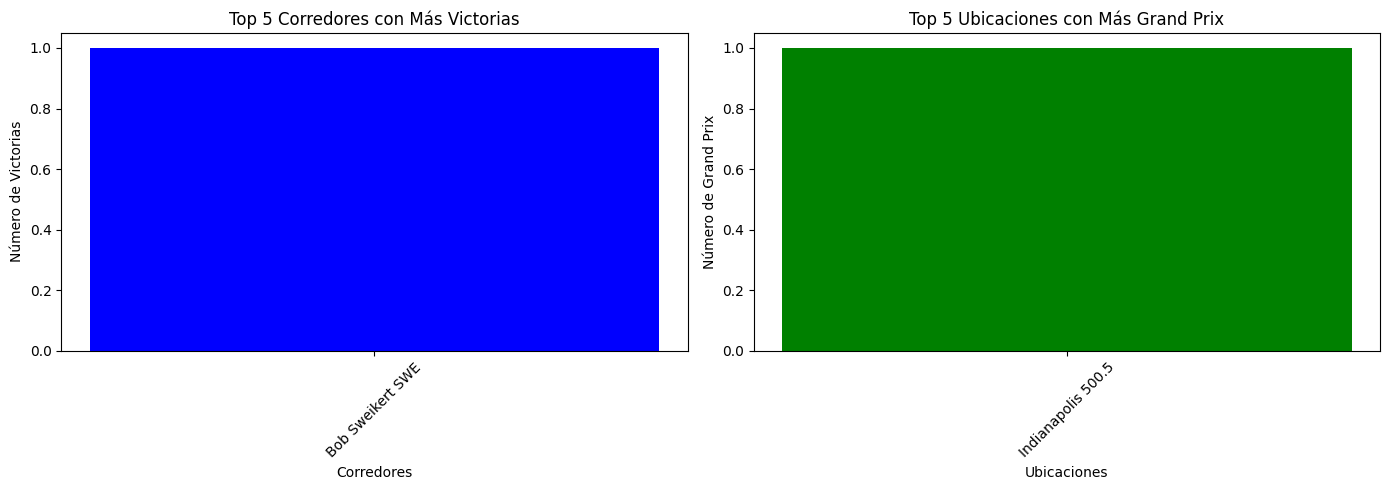

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Top corredor con más victorias
top_winners = df_cleaned["1"].value_counts().head(5)
axes[0].bar(top_winners.index, top_winners.values, color='blue')
axes[0].set_title("Top 5 Corredores con Más Victorias")
axes[0].set_xlabel("Corredores")
axes[0].set_ylabel("Número de Victorias")
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Top lugar con más Grand Prix
top_locations = df_cleaned["Unnamed: 0"].value_counts().head(5)
axes[1].bar(top_locations.index, top_locations.values, color='green')
axes[1].set_title("Top 5 Ubicaciones con Más Grand Prix")
axes[1].set_xlabel("Ubicaciones")
axes[1].set_ylabel("Número de Grand Prix")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Relación entre Victorias y Podios en la Fórmula 1

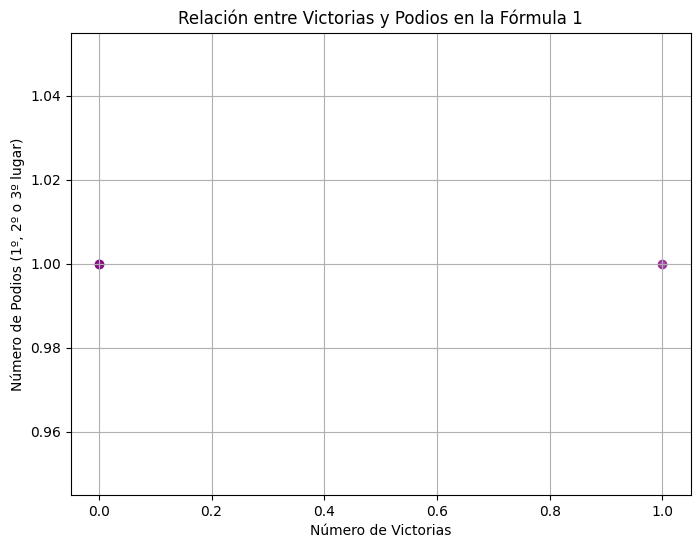

In [9]:
# Contar las victorias y podios (1º, 2º, 3º lugares) de cada piloto
wins = df_cleaned["1"].value_counts()
runner_ups = df_cleaned["2"].value_counts()
third_places = df_cleaned["3"].value_counts()

# Sumar todas las veces que un piloto ha quedado en el podio (1º, 2º o 3º lugar)
podiums = wins.add(runner_ups, fill_value=0).add(third_places, fill_value=0)

# Crear un DataFrame con ambos valores
df_podiums_vs_wins = pd.DataFrame({
    "Wins": wins,
    "Podiums": podiums
}).fillna(0)

# Graficar la relación
plt.figure(figsize=(8, 6))
plt.scatter(df_podiums_vs_wins["Wins"], df_podiums_vs_wins["Podiums"], alpha=0.7, color="purple")
plt.xlabel("Número de Victorias")
plt.ylabel("Número de Podios (1º, 2º o 3º lugar)")
plt.title("Relación entre Victorias y Podios en la Fórmula 1")
plt.grid(True)

# Mostrar la gráfica
plt.show()